EXECUTANT SIMULACIÓ PER 1 punts K


Gamma-point calculation with interaction between periodic images
Some features might not work optimally:
e.g. DM initialization from atomic data
Job completed


EXECUTANT SIMULACIÓ PER 2 punts K


Job completed


EXECUTANT SIMULACIÓ PER 3 punts K


Job completed


EXECUTANT SIMULACIÓ PER 4 punts K


Job completed


EXECUTANT SIMULACIÓ PER 5 punts K


Job completed


EXECUTANT SIMULACIÓ PER 6 punts K


Job completed


EXECUTANT SIMULACIÓ PER 7 punts K


Job completed


EXECUTANT SIMULACIÓ PER 8 punts K


Job completed


EXECUTANT SIMULACIÓ PER 9 punts K


Job completed


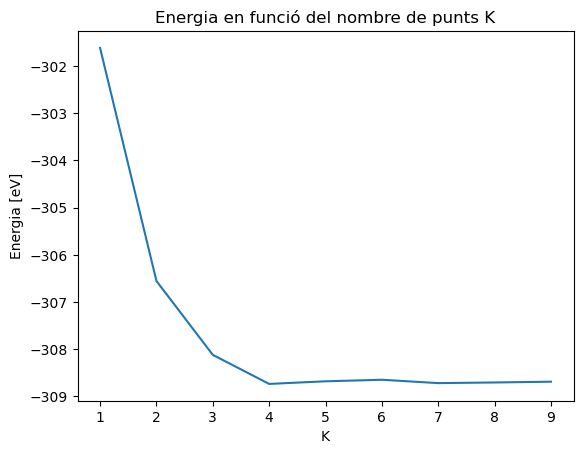

In [ ]:
import numpy as np
import sisl
import sisl.viz
import plotly.express as px
import matplotlib.pyplot as plt
from pathlib import Path
import os

graphene = sisl.geom.graphene()
graphene.plot(axes="xy")

inputs_dir = Path("convergence/inputs")
graphene.write(inputs_dir / "geom.fdf")
root = Path("convergence/numK")
root.mkdir(exist_ok=True)

#num de punts K
num = [1, 2, 3, 4, 5, 6, 7, 8, 9]

#Iteraa sobre el nombre de punts K
for num in num:
    print(f"EXECUTANT SIMULACIÓ PER {num} punts K")

    # Defineix el directori per a aquest tamany de base i el crea si no existeix
    basis_dir = root / str(num)
    basis_dir.mkdir(exist_ok=True)

    # Copia els inputs del directori d'inputs a aquest.
    os.system(f"cp {inputs_dir}/* {basis_dir}")

    # Dins d'aquest directori, crea un fitxer RUN.fdf
    with open(basis_dir / 'RUN.fdf', 'w') as l:
        l.write("%include geom.fdf \n")
        l.write(f"""%block kgrid.MonkhorstPack)
        {num} 0 0 0)
        0 {num} 0 0 0)
        0 0 1  0)
        %endblock kgrid.MonkhorstPack """)

    # Executar SIESTA
    siesta_path = "/opt/anaconda3/envs/nanociencia/bin/siesta" #...escriu aquí la ruta de siesta
    os.system(f"cd {basis_dir}; {siesta_path} RUN.fdf > RUN.out")

E = []

for num in range(1, 10, 1):
    # Defineix el directori on s'ha executat aquest càlcul de tamany de base.
    basis_dir = root / str(num)
    out_file = sisl.get_sile(basis_dir / "RUN.out", cls=sisl.io.stdoutSileSiesta)
    energies = out_file.read_energy()

    # En particular, ens interessa l'energia total, que obtenim i guardem a la llista
    Etot = energies['total']
    E.append(Etot)

x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
plt.plot(x, E)
plt.xlabel('K')
plt.ylabel('Energia [eV]')
plt.title('Energia en funció del nombre de punts K')
plt.show()